In [12]:
import tensorflow as tf
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import plotly.graph_objs as go
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [19]:
def get_predictions_by_column(data, month):
        
    dataset = data.values
    training_data_len = math.ceil(len(dataset) * .8)

    window_length = 20

    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(dataset.reshape(-1, 1)) 
    
    train_data = scaled_data[0:training_data_len]
    x_train = []
    y_train = []

    for i in range(window_length, len(train_data)):
        x_train.append(train_data[i-window_length:i])
        y_train.append(train_data[i])
        
    x_train, y_train = np.array(x_train), np.array(y_train)
    
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],x_train.shape[2]))
    
    model = Sequential()
    model.add(LSTM(window_length,return_sequences = True, input_shape = (x_train.shape[1],x_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(window_length,return_sequences = False))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='linear'))
    
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
    
    history = model.fit(x_train, y_train, batch_size = 3, epochs = 6)
    pyplot.title('Loss')
    pyplot.plot( history.history['loss'], label='train')
    pyplot.legend()
    pyplot.show()
    
    scaled = scaled_data.copy()

    days = []
    for i in range(len(data), len(data) + month):
        days.append(i)
        
    res = []
    for i in range(0, len(days)):
        test_data = scaled[len(scaled) - window_length:]
        x_test = []
        for i in range(window_length, len(test_data)+1):
            x_test.append(test_data[i-window_length:i])
        x_test = np.array(x_test)
        x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],x_test.shape[2]))
        predictions = model.predict(x_test)
        ar = list(scaled)
        ar.append(predictions[0])
        scaled = np.array(ar)
        predictions = scaler.inverse_transform(predictions)
        res.append(predictions[0][0])
        
    return res

In [20]:
def get_table_of_predictions(data, month):
    
    d_of_values = {}
    count = len(data.columns.tolist())
    
    for i in range(1, count):
        res = get_predictions_by_column(data.iloc[:,i], month)
        d_of_values[data.columns.tolist()[i]] = res
    
    df = pd.DataFrame(d_of_values) 
    
    return df

Epoch 1/6
39/39 [==============================] - 0s 11ms/step - loss: 0.0312 - accuracy: 0.0086
Epoch 2/6
39/39 [==============================] - 0s 11ms/step - loss: 0.0282 - accuracy: 0.0086
Epoch 3/6
39/39 [==============================] - 0s 11ms/step - loss: 0.0228 - accuracy: 0.0086
Epoch 4/6
39/39 [==============================] - 0s 11ms/step - loss: 0.0200 - accuracy: 0.0086
Epoch 5/6
39/39 [==============================] - 0s 11ms/step - loss: 0.0183 - accuracy: 0.0086ETA: 0s - loss: 0.0258 - accuracy: 
Epoch 6/6
39/39 [==============================] - 1s 15ms/step - loss: 0.0126 - accuracy: 0.0086


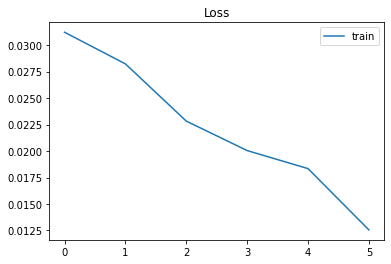

Epoch 1/6
39/39 [==============================] - 0s 10ms/step - loss: 0.0084 - accuracy: 0.0086
Epoch 2/6
39/39 [==============================] - 0s 11ms/step - loss: 0.0042 - accuracy: 0.0086
Epoch 3/6
39/39 [==============================] - 0s 11ms/step - loss: 0.0035 - accuracy: 0.0086
Epoch 4/6
39/39 [==============================] - 0s 11ms/step - loss: 0.0037 - accuracy: 0.0086
Epoch 5/6
39/39 [==============================] - 0s 11ms/step - loss: 0.0048 - accuracy: 0.0086
Epoch 6/6
39/39 [==============================] - 0s 11ms/step - loss: 0.0036 - accuracy: 0.0086


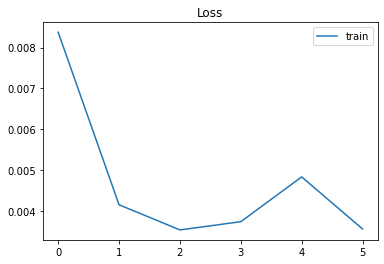

Epoch 1/6
39/39 [==============================] - 0s 12ms/step - loss: 0.0356 - accuracy: 0.0086
Epoch 2/6
39/39 [==============================] - 0s 11ms/step - loss: 0.0301 - accuracy: 0.0086
Epoch 3/6
39/39 [==============================] - 0s 11ms/step - loss: 0.0246 - accuracy: 0.0086
Epoch 4/6
39/39 [==============================] - 0s 12ms/step - loss: 0.0245 - accuracy: 0.0086
Epoch 5/6
39/39 [==============================] - 0s 12ms/step - loss: 0.0175 - accuracy: 0.0086
Epoch 6/6
39/39 [==============================] - 0s 12ms/step - loss: 0.0187 - accuracy: 0.0086


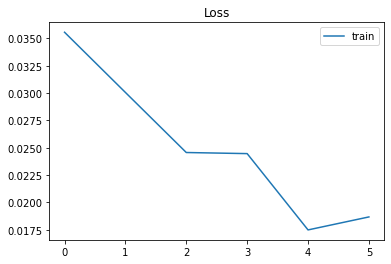

Epoch 1/6
39/39 [==============================] - 1s 13ms/step - loss: 2.7474e-04 - accuracy: 0.0086
Epoch 2/6
39/39 [==============================] - 1s 13ms/step - loss: 7.1373e-05 - accuracy: 0.0086
Epoch 3/6
39/39 [==============================] - 0s 11ms/step - loss: 1.9505e-05 - accuracy: 0.0086
Epoch 4/6
39/39 [==============================] - 0s 11ms/step - loss: 4.6451e-05 - accuracy: 0.0086
Epoch 5/6
39/39 [==============================] - 0s 11ms/step - loss: 4.9675e-05 - accuracy: 0.0086
Epoch 6/6
39/39 [==============================] - 0s 11ms/step - loss: 9.7816e-05 - accuracy: 0.0086


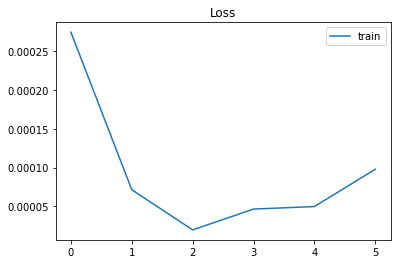

Epoch 1/6
39/39 [==============================] - 0s 13ms/step - loss: 0.0130 - accuracy: 0.0086
Epoch 2/6
39/39 [==============================] - 1s 14ms/step - loss: 0.0058 - accuracy: 0.0086
Epoch 3/6
39/39 [==============================] - 0s 12ms/step - loss: 0.0069 - accuracy: 0.0086
Epoch 4/6
39/39 [==============================] - 0s 11ms/step - loss: 0.0052 - accuracy: 0.0086
Epoch 5/6
39/39 [==============================] - 1s 13ms/step - loss: 0.0058 - accuracy: 0.0086
Epoch 6/6
39/39 [==============================] - 1s 13ms/step - loss: 0.0048 - accuracy: 0.0086


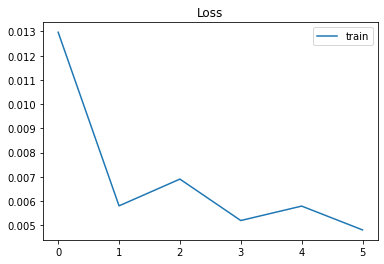

Epoch 1/6
39/39 [==============================] - 0s 11ms/step - loss: 0.0368 - accuracy: 0.0086
Epoch 2/6
39/39 [==============================] - 0s 12ms/step - loss: 0.0196 - accuracy: 0.0086
Epoch 3/6
39/39 [==============================] - 0s 12ms/step - loss: 0.0151 - accuracy: 0.0086
Epoch 4/6
39/39 [==============================] - 0s 12ms/step - loss: 0.0138 - accuracy: 0.0086
Epoch 5/6
39/39 [==============================] - 0s 12ms/step - loss: 0.0121 - accuracy: 0.0086
Epoch 6/6
39/39 [==============================] - 0s 12ms/step - loss: 0.0139 - accuracy: 0.0086


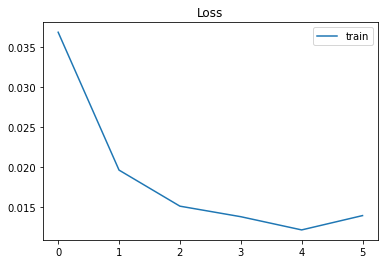

,AFLT,LKOH,MAGN,SBER,SIBN,SNGS
0,62.371037,5744.066406,26.522884,-195.873886,280.809113,31.480827
1,60.804794,5810.653320,25.361036,-197.264175,279.176819,32.339222
2,56.912552,5859.174316,23.680229,-198.821487,275.156525,32.759804
3,51.907974,5895.243652,21.792543,-199.990677,269.876648,32.863567
4,46.447441,5922.798340,19.917955,-200.636703,263.803253,32.744884
5,41.017620,5946.648438,18.048567,-200.811951,257.417755,32.481949
6,36.426113,5968.019531,16.314121,-200.635818,251.114410,32.137253
7,32.233044,5987.020020,14.719094,-200.234299,244.955109,31.743982
8,28.974651,6003.424805,13.354198,-199.716141,238.927856,31.332394
9,26.373966,6018.020996,12.241398,-199.162704,233.122009,30.910250


In [21]:
data = pd.read_csv('Общий.csv')
month = 10
df = get_table_of_predictions(data, month)
df

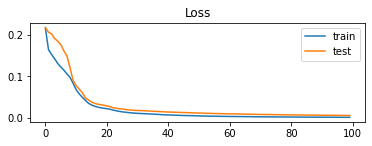

In [8]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot
# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)
# standardize dataset
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_squared_logarithmic_error', optimizer=opt, metrics=['mse'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
_, train_mse = model.evaluate(trainX, trainy, verbose=0)
_, test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()